# Carga de bibliotecas

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Carga de información desde el set de datos

In [55]:
rain_data = pd.read_csv("rainfall_dataset.csv",names=['AÑO', 'ANUAL', 'CONSUMO'])
rain_data.head(10)

,AÑO,ANUAL,CONSUMO
0,1901,3373.2,1
1,1902,3520.7,1
2,1903,2957.4,0
3,1904,3079.6,1
4,1905,2566.7,0
5,1906,2534.4,0
6,1907,3347.9,1
7,1908,3576.4,1
8,1910,2899.4,0
9,1911,2687.2,0


In [56]:
print("Número de elementos totales del set de datos: " + str(len(rain_data.index)))

Número de elementos totales del set de datos: 104


# Total de años abastecidos del consumo de agua desde el histórico

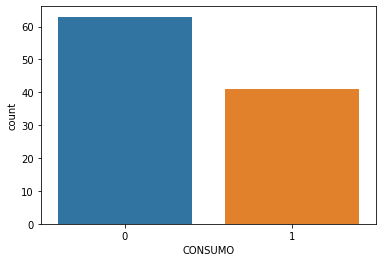

In [57]:
sns.countplot(x="CONSUMO", data=rain_data)

# Relación de frecuencia (número de elementos) con la precipitación total

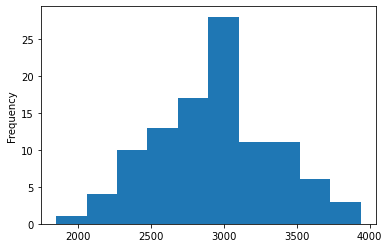

In [58]:
rain_data["ANUAL"].plot.hist()

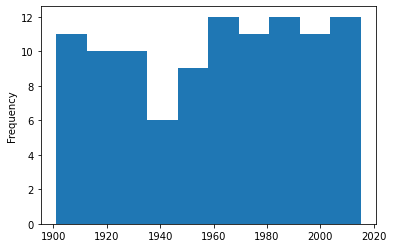

In [59]:
rain_data["AÑO"].plot.hist()

# Entrenamiento

In [60]:
X = rain_data.drop("CONSUMO", axis=1)
y = rain_data["CONSUMO"]

In [61]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=15)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression()

In [78]:
y = y[np.logical_not(np.isnan(y))]

In [79]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [80]:
predictions = logmodel.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

In [82]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      0.92      0.96        36\n           1       0.84      1.00      0.91        16\n\n    accuracy                           0.94        52\n   macro avg       0.92      0.96      0.94        52\nweighted avg       0.95      0.94      0.94        52\n'

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm = confusion_matrix(y_test, predictions)
cm

array([[33,  3],
       [ 0, 16]], dtype=int64)

Text(69.0, 0.5, 'Truth')

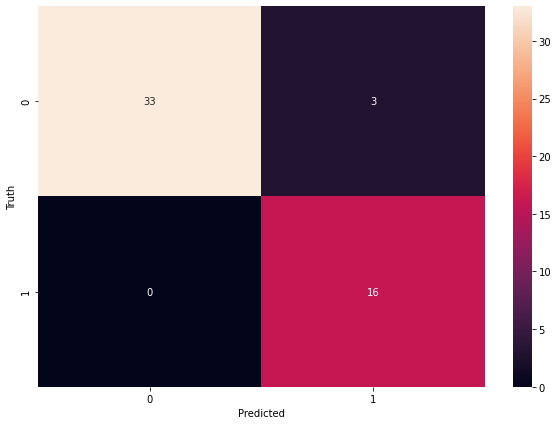

In [85]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Precisión de la predicción

In [86]:
from sklearn.metrics import accuracy_score

In [91]:
str(accuracy_score(y_test, predictions) * 100) + "%"

'94.23076923076923%'

# Comprobación con nueva predicción

In [94]:
value = [[2016,3100]]
new_prediction = logmodel.predict(value)

#logmodel.predict_proba(X)
proba = logmodel.predict_proba(value)

# Probability of admission
print('La probabilidad de abastecer el consumo es de ', proba[0][1]*100, '%')

La probabilidad de abastecer el consumo es de  100.0 %
